# Decision Tree with the Iris Dataset

By Jen Selby and Carl Shan

For an explanation of decision trees, see [our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#decision-trees).

This notebook uses example code from http://scikit-learn.org/stable/modules/tree.html.

## Setup

Before you can run this code, you will need to install some extra software.

1. Install homebrew (if you don't already have it) following the [directions on their site](https://brew.sh/).
1. Install the graphviz library that will let us visualize the decision tree. In Terminal, run
>`brew install graphviz`
1. Install the pydot library that allows you to call graphviz from Python. In Terminal run
>`pip3 install pydot`.

# Introduction

This Jupyter Notebook will have you look at the Iris dataset.

The Iris flower dataset is so famous it has its own [Wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set). The dataset contains 150 records with 5 different attributes.

The dataset contains 50 samples from three different species of the *Iris* flowers: *setosa*, *virginica* and *versicolor*).

![Iris Flowers](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

You will be building a decision tree classification algorithm to predict which species a flower is, given that you know the 5 attributes of the folor.

In [3]:
from sklearn.datasets import load_iris # the iris dataset is included in scikit-learn
from sklearn import tree # for fitting our model
from sklearn import ensemble # for fitting our model
from numpy.core.umath_tests import inner1d
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# these are all needed for the particular visualization we're doing
from sklearn.externals.six import StringIO
import pydot
import os.path
import numpy

# to display graphs in this notebook
%pylab inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Populating the interactive namespace from numpy and matplotlib


## Iris Dataset

Before you go on, make sure you understand this dataset. Modify the cell below to examine different parts of the dataset that are contained in the 'iris' dictionary object.

What are the features? What are we trying to classify?

In [4]:
iris = load_iris()

## Converting it to a DataFrame

You can also try looking at it using a [pandas dataframe](https://jennselby.github.io/MachineLearningCourseNotes/#pandas).

In [5]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plotting the Iris Data

Let's visualize our dataset, so that we can better understand what it looks like.

Change the first two variables to change which features you are looking at.

Let's also break up the data into the three separate classes just for plotting.

In [7]:
class_1 = iris_df[iris_df['target'] == 'setosa']
class_2 = iris_df[iris_df['target'] == 'virginica']
class_3 = iris_df[iris_df['target'] == 'versicolor']

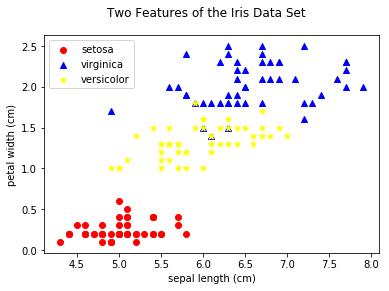

In [8]:
# create a figure and label it
fig = plt.figure()
fig.suptitle('Two Features of the Iris Data Set')

x_axis = 'sepal length (cm)'
y_axis = 'petal width (cm)'

plt.xlabel(x_axis)
plt.ylabel(y_axis)

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = plt.scatter(class_1[x_axis], class_1[y_axis],
                            c="red", marker="o", label='setosa')
scatter_1 = plt.scatter(class_2[x_axis], class_2[y_axis],
                            c="blue", marker="^", label='virginica')
scatter_2 = plt.scatter(class_3[x_axis], class_3[y_axis],
                            c="yellow", marker="*", label='versicolor')

# add a legend to explain which points are which
plt.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the graph
plt.show()

## Training a Decision Tree Model Training

Next, we want to fit our decision tree model to the iris data we're using.

In [9]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [10]:
training_cols = [
                 'sepal length (cm)', 
                 'sepal width (cm)', 
                 'petal length (cm)',
                 'petal width (cm)'
                ]

testing_col = ['target']

In [11]:
#Split into testing and training data
iris_df_train, iris_df_test = train_test_split(iris_df, test_size=0.2)

In [12]:
# Train the model on all of the data
# Look how easy it is!

tree_model = tree.DecisionTreeClassifier(max_depth=4)
tree_model.fit(iris_df_train[training_cols], iris_df_train[testing_col])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Cool. Now you've built a Decision Tree classification model. Great work!

Let's figure out how well this model fit the data now.

## Validation: Visualization of Model Output

Using `graphviz` and `pydot`, we can create a flowchart that shows the model decisions. The flowchart will be printed to a PDF on your desktop.

In [13]:
dot_data = StringIO()
tree.export_graphviz(tree_model, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/iris_decision_tree.pdf"))

Now pick one set of exercises below to work on for your homework.

# Exercise Option (Standard Difficulty)

Answer the following questions. You may find it helpful to compare the PDF output to the graph above (remember you can change which columns the graph is displaying), to see the boundaries the decision tree is finding.

1. According to the PDF, what feature values would tell you with high probability that you were looking at a setosa iris?
1. According to the PDF, which features would you look at to tell a virginica from a versicolor?
1. What is the value array in the PDF showing?
1. Try using subsets of the input data (look at the `iris_inputs` variable in [Logistic Regression Iris](https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LogisticRegressionIris.ipynb) to see how to use only some of the columns in the model). How does this change the decision tree?

In [14]:
### YOUR ANSWERS HERE







# Exercise Option (Advanced)

Try fitting a Random Forest model to the iris data. See [this example](http://scikit-learn.org/stable/modules/ensemble.html#forest) to help you get started.

How does the performance and output of Random Forest compare to the single Decision Tree? Since you can't get the graphical representation of the Random Forest model the way we did for the single Decision Tree, you'll have to think of a different way to understand what the model is doing. Think about how we can [validate the performance of our classifier models](https://jennselby.github.io/MachineLearningCourseNotes/#classification-validation).

In [15]:
### Random Tree Model
random_forest = ensemble.RandomForestClassifier(n_estimators=100,max_features='log2',oob_score=True)

random_forest.fit(iris_df_train[training_cols], iris_df_train[testing_col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [16]:
print(f1_score(iris_df_test[testing_col],tree_model.predict(iris_df_test[training_cols]), average='micro'))


0.9333333333333333
